## HOMEWORK 12

In [19]:
import os
import cv2
import numpy as np
from time import time
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

plt.rcParams['figure.figsize'] = [15, 6]

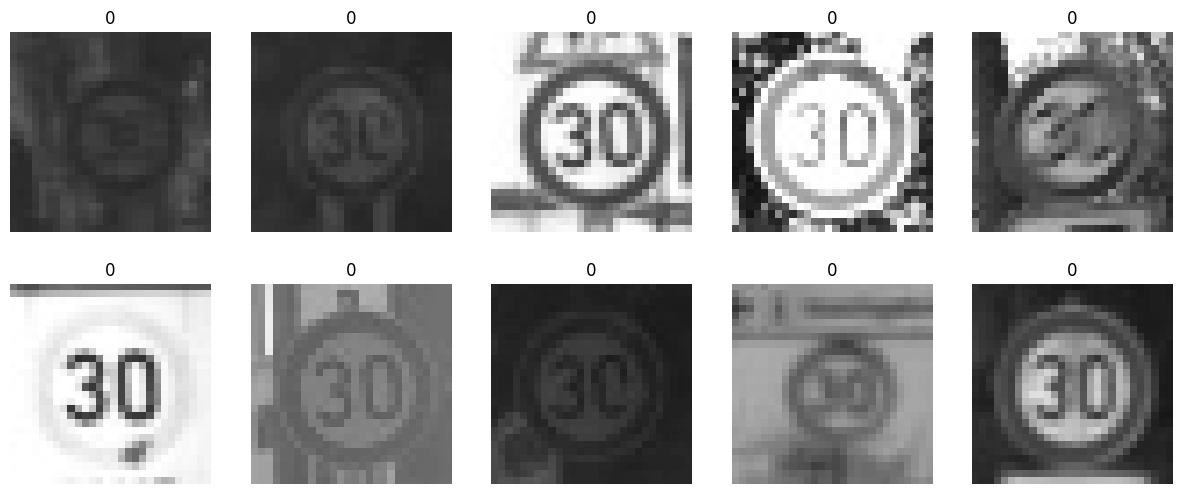

In [20]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

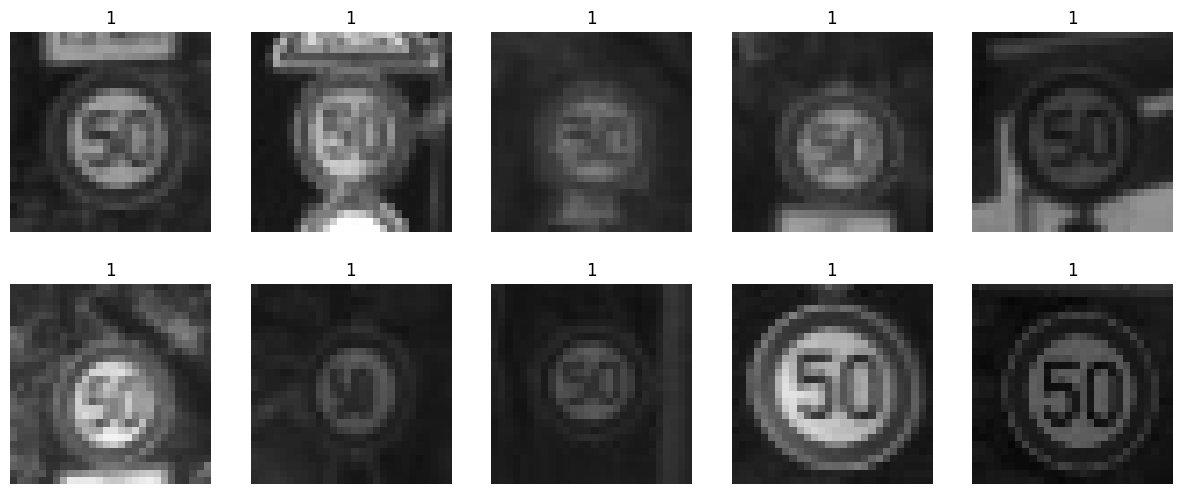

In [21]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [22]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [23]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [24]:
start = time()
pixels = []
for image in images:
    pixels_ = []
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
            pixels_.append(image[r,c])
    pixels.append(pixels_)
    
pixels = np.array(pixels)/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 1.6338608264923096


In [25]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.0164492130279541


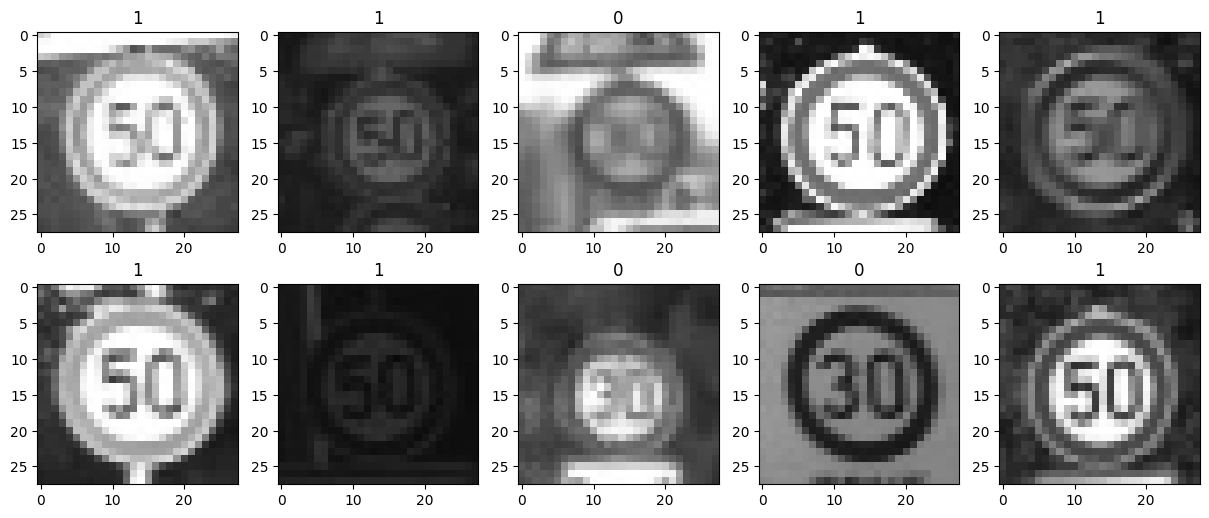

In [26]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [27]:
inputs = Input(shape=(pixels.shape[1],))

outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

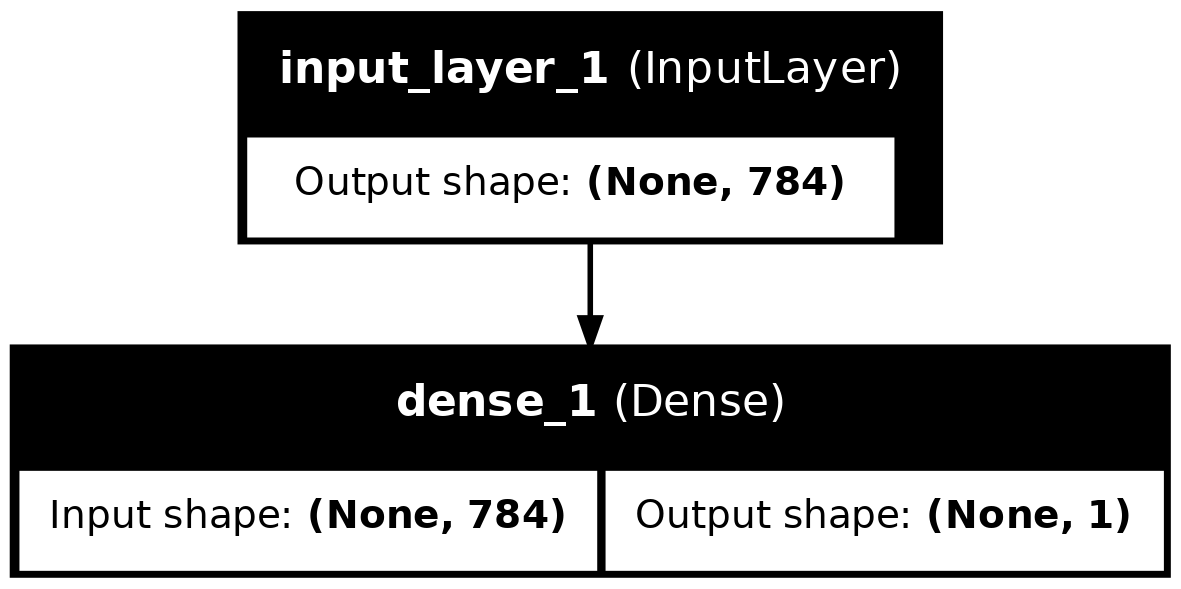

In [28]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


In [29]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')


In [30]:
history = model.fit(pixels, labels, epochs=10, batch_size=32)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3531
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2338
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1912
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1580
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1378
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1253
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1136
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1084
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1074
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1033


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

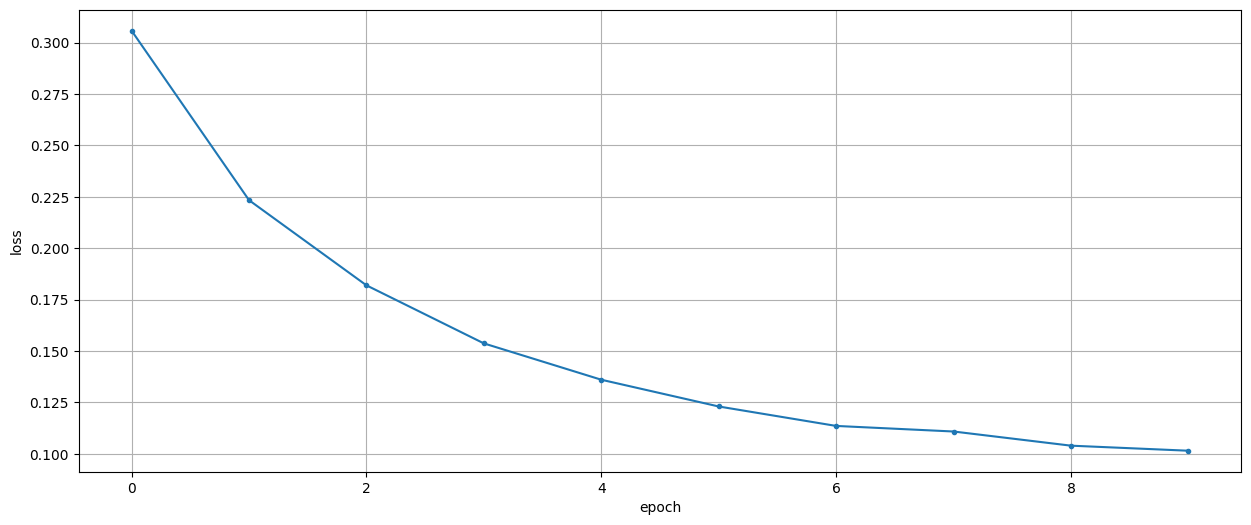

In [31]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.42530918] [0.42530918]


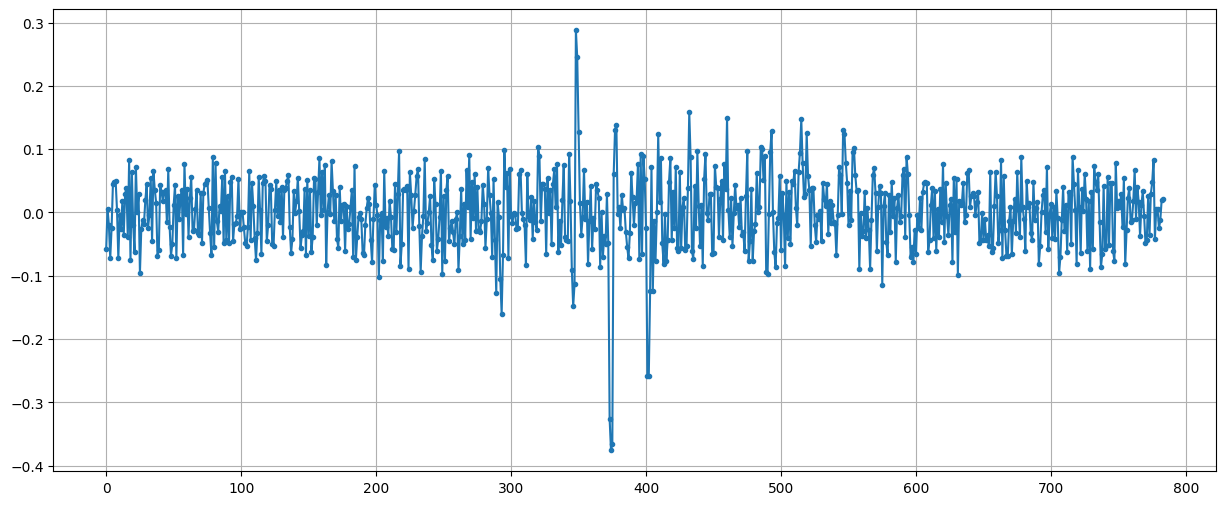

In [32]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [33]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.02007663]] 0


In [34]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


In [35]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9201342281879195


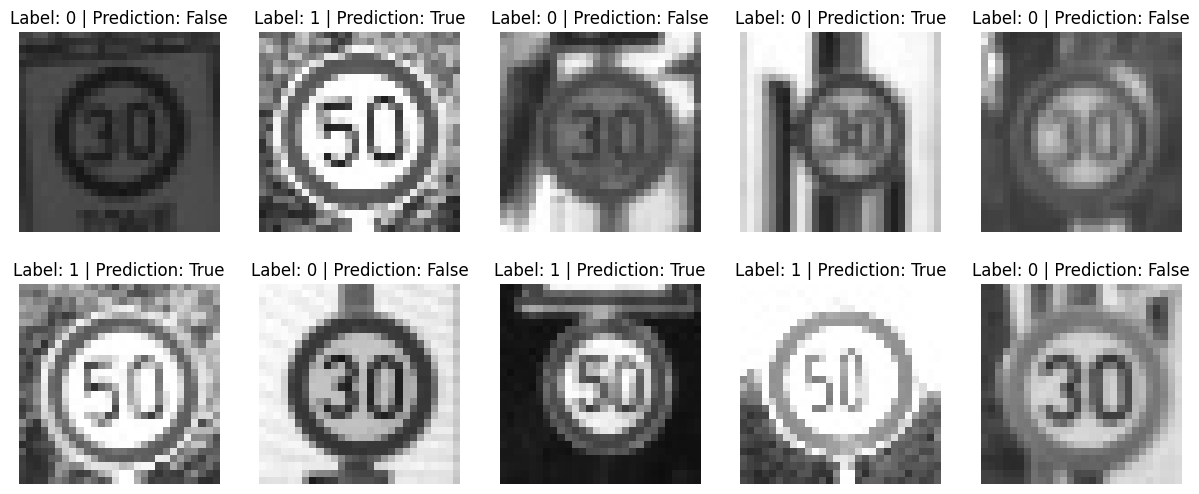

In [36]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)